# EDA

In [29]:
import sklearn as skn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [4]:
df_lf = pd.read_csv("https://storage.googleapis.com/h3-data/listings_final.csv",sep=';')
df_pa = pd.read_csv("https://storage.googleapis.com/h3-data/price_availability.csv",sep=';')

In [8]:
df_res = pd.merge(df_lf,df_pa.groupby('listing_id')['local_price'].mean('local_price'),how='inner', on='listing_id')

## diagramme de répartition des données

(array([  6.,  15.,  30.,  24.,  54.,  81.,  52., 135.,  73., 529.]),
 array([0.33 , 0.397, 0.464, 0.531, 0.598, 0.665, 0.732, 0.799, 0.866,
        0.933, 1.   ]),
 <BarContainer object of 10 artists>)

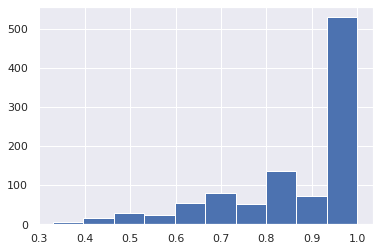

In [63]:
plt.hist(df_res.pricing_monthly_factor)

(array([  1.,   4.,  10.,   8.,  18.,  41., 104., 151., 114., 548.]),
 array([0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84, 0.88, 0.92, 0.96, 1.  ]),
 <BarContainer object of 10 artists>)

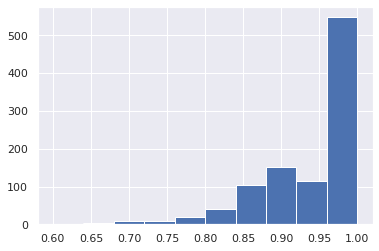

In [62]:
plt.hist(df_res.pricing_weekly_factor)

(array([670., 226.,  62.,  18.,   7.,  10.,   3.,   1.,   1.,   1.]),
 array([  17.86372361,  194.13641861,  370.4091136 ,  546.6818086 ,
         722.9545036 ,  899.22719859, 1075.49989359, 1251.77258859,
        1428.04528358, 1604.31797858, 1780.59067358]),
 <BarContainer object of 10 artists>)

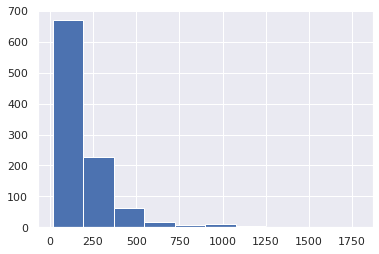

In [64]:
plt.hist(df_res.local_price)

(array([445., 428.,  68.,  44.,   6.,   4.,   2.,   0.,   0.,   2.]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <BarContainer object of 10 artists>)

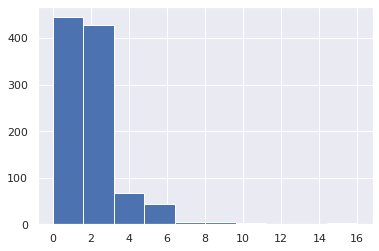

In [66]:
plt.hist(df_res.beds)

(array([418.,  98., 307., 101.,  43.,   8.,  12.,   2.,   5.,   5.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

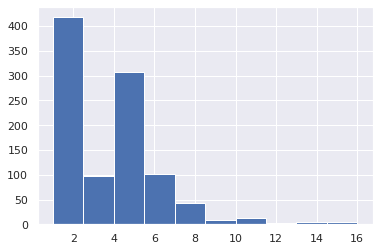

In [69]:
plt.hist(df_res.person_capacity)

(array([166., 504.,   0., 210.,   0.,  87.,  23.,   0.,   6.,   3.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

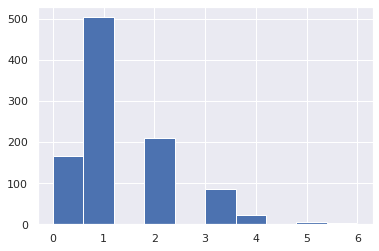

In [71]:
plt.hist(df_res.bedrooms)

(array([  3.,   7., 759.,  72., 116.,  20.,  11.,   6.,   2.,   3.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

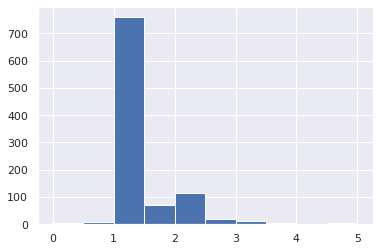

In [67]:
plt.hist(df_res.bathrooms)

On peut voir que le pricing en fonction des semaines et des mois et similaire.<br>
Et on peut voir une similarité entre le nombre de lits et le nombre max de personne possible dans une chambre

## Boite a moustache

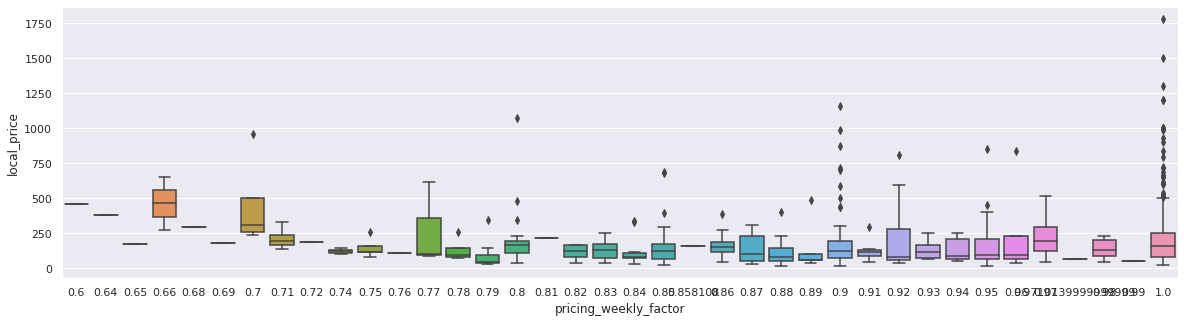

In [78]:
fig = plt.gcf()
fig.set_size_inches(20,5)
sns.boxplot(x='pricing_weekly_factor',y='local_price',data=df_res);

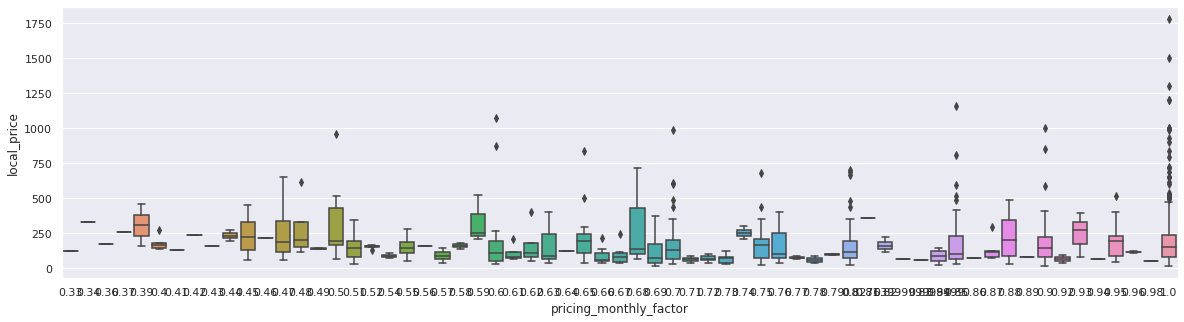

In [77]:
fig = plt.gcf()
fig.set_size_inches(20,5)
sns.boxplot(x='pricing_monthly_factor',y='local_price',data=df_res);

sans surprise on peut voir des similarités entre les pricings par rapport aux prix locaux mais on voit pas de courbe, plus un effet de vague et on constate beaucoup de valeurs extremes pour la colonne 1.0

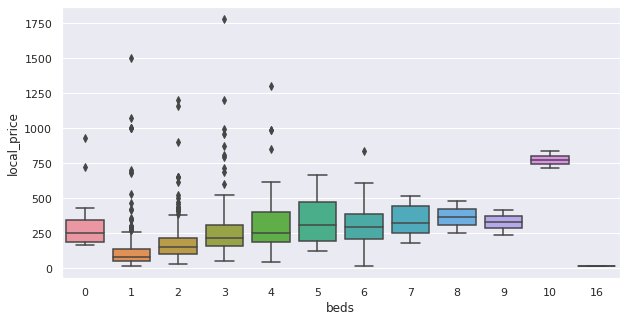

In [61]:
fig = plt.gcf()
fig.set_size_inches(10,5)
sns.boxplot(x='beds',y='local_price',data=df_res);

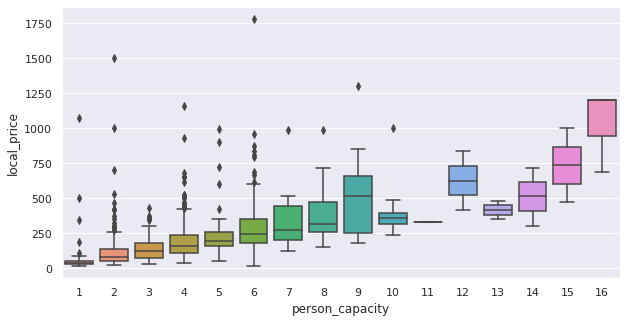

In [81]:
fig = plt.gcf()
fig.set_size_inches(10,5)
sns.boxplot(x='person_capacity',y='local_price',data=df_res);

On peut voir des similarités entre le nombre de lits et le nombre de personne pouvant être accueillis<br>
Et on constate que le logement le plus cher à 3 lits et peut accueillir jusqu'à 6 personnes, on peut imaginer que ce ne sont que des lits double

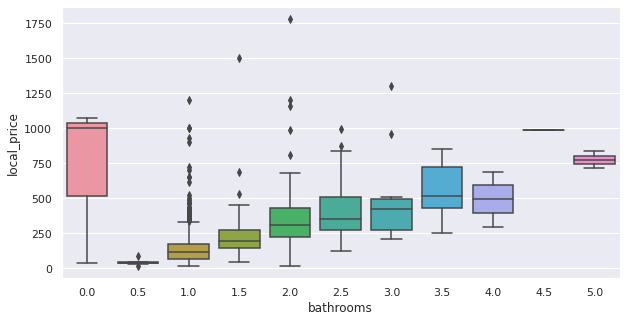

In [76]:
fig = plt.gcf()
fig.set_size_inches(10,5)
sns.boxplot(x='bathrooms',y='local_price',data=df_res);

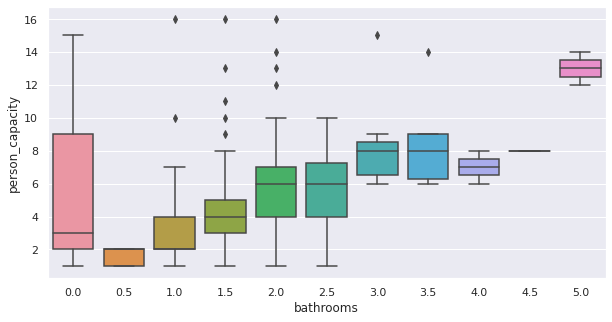

In [75]:
fig = plt.gcf()
fig.set_size_inches(10,5)
sns.boxplot(x='bathrooms',y='person_capacity',data=df_res);

On peut voir que plus y a de salle de bains et plus c'est cher en moyenne, et on peut voir que la relation salle de bains prix et salle de bains et capacités de personnes<br>
On peut voir que ce sont des courbes ascendantes

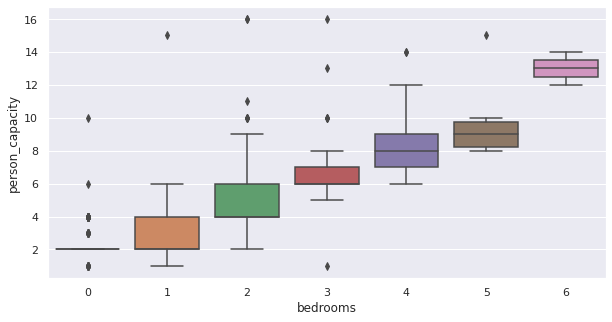

In [74]:
fig = plt.gcf()
fig.set_size_inches(10,5)
sns.boxplot(x='bedrooms',y='person_capacity',data=df_res);

On peut voir que la relation bedrooms et person_capacity donne une courbe positive

## heatmap

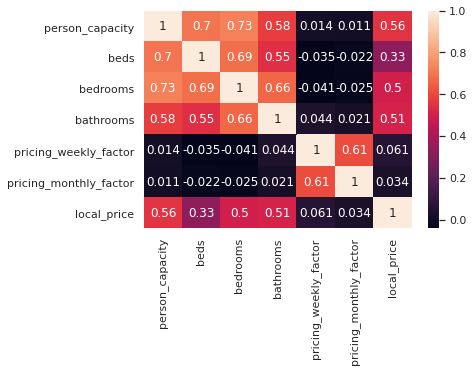

In [44]:
cleans = df_res[["person_capacity","beds","bedrooms","bathrooms","pricing_weekly_factor","pricing_monthly_factor","local_price"]]
sns.heatmap(cleans.corr(),annot = True)
plt.show()

sur la heatmap on peut voir la corrélation entre :<br>
les pricings uniquement<br>
et une relation entre les capacités de personnes,lits, chambres et salle de bain<br>
et surtout ce qui nous interesse la relation entre le prix et les autres données et on peut voir que la capacité les salles de bains et les chambres sont entre 50 et 60%

donc faire une regression lineaire sur ces 4 là donnera probablement un résultat plutot qualitatif